In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## Standard Normal Curve ##

The *normal* or *Gaussian* curves are a family of bell-shaped curves named for the German mathematician and scientist [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss).

Here are few members of the family. You can see that there really is only one bell shape; the differences between the curves are due to where they are centered and how wide the bells are. In other words, the differences are due to the scales on which the variables are being measured.

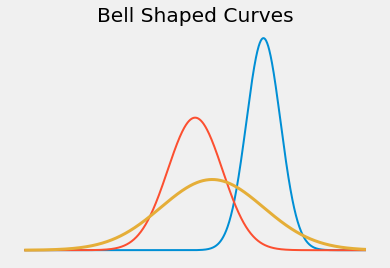

In [28]:
# NO CODE

x = np.arange(-5, 5.01, 0.01)
y1 = stats.norm.pdf(x, 2, 0.5)
y2 = stats.norm.pdf(x, 0, 0.8)
y3 = stats.norm.pdf(x, 0.5, 1.5)
plt.plot(x, y1, lw=2)
plt.plot(x, y2, lw=2)
plt.plot(x, y3, lw=3)
plt.xticks([])
plt.yticks([])
plt.title('Bell Shaped Curves');

In essence, therefore, there is only one normal curve – all the others can be derived by changing the origin and the units of measurement. 

That all-important normal curve is called the *standard normal* curve. This section is a workout in using the curve. In the next section, we will use these skills and the Central Limit Theorem to approximate probabilities.

### The Standard Normal Curve ###

The standard normal curve is defined by

$$
\phi(z) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}, ~~~~~ -\infty < z < \infty
$$

That's the lower case Greek letter $\phi$. The figure below shows the graph of $\phi$. 

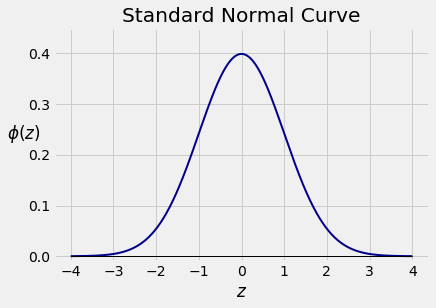

In [37]:
# NO CODE

z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.xticks(np.arange(-4, 4.01))
plt.ylim(-0.01, 0.45)
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0)
plt.title('Standard Normal Curve');

Some properties of the curve are clear from the graph or equation. Others need more work to establish. In this course it is enough that you observe what you can and leave the proofs to another class.
- The curve is bell-shaped and symmetric about 0.
- The points of inflection are at $z=-1$ and $z=1$.
- Even though the curve is defined over the entire number line, it is pretty close to 0 for $\vert z \vert > 3$.
- The curve can be thought of as an approximation to a probability histogram, because the total area under the curve is 1.

### The Standard Normal 'CDF' ###

If you think of the standard normal curve as a probability histogram, then it is natural to think of areas under the curve as probabilities. In particular, the function $\Phi$ defined by

$$
\Phi(z) ~ = ~ \int_{-\infty}^z \phi(x)dx
$$

returns all the area under the curve to the left of $z$, and is called the 'cdf'. At the moment, think of it as a cdf by analogy with the discrete cumulative distribution functions that you have seen before. 

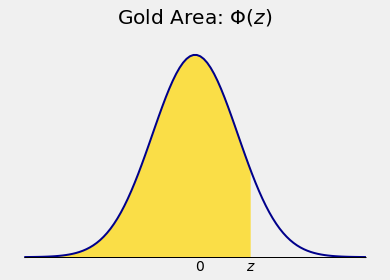

In [18]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1.28)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(1.2, -0.025, '$z$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(z)$');

The area under the curve over any interval $(z_1, z_2)$ is then $\Phi(z_2) - \Phi(z_1)$.

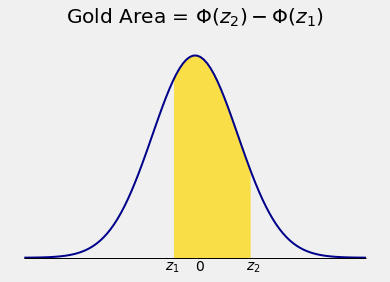

In [5]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1.28, left_end = -0.5)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(1.2, -0.025, '$z_2$')
plt.text(-0.7, -0.025, '$z_1$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area = $\Phi(z_2) - \Phi(z_1)$');

### Numerical Values of the Areas ###

If we had a formula for $\Phi$, we could plug into that formula to find areas under the standard normal curve. But this is where the curve gets even more interesting: even though we can show that the total area under the curve is 1, there is no closed-form formula for $\Phi$. The numerical value of the integral has to be evaluated by numerical approximation.

That is why almost all statistics textbooks include a normal distribution table. We can do better because we have Python.

The `SciPy` function `stats.norm.cdf` takes in $z$ and returns $\Phi(z)$. Thus the value

$$
\Phi(1) ~ = ~ \int_{-\infty}^1 \phi(x)dx ~ \approx ~ 0.84
$$

is found by evaluating the following expression: 

In [6]:
stats.norm.cdf(1)

0.8413447460685429

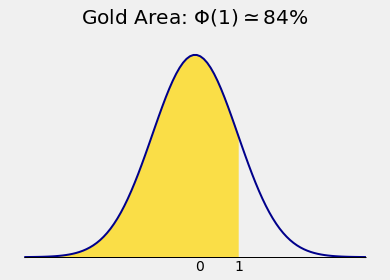

In [15]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(0.9, -0.025, '$1$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(1) \simeq 84\%$');

The area of the tail to the right of 1 is therefore about $16\%$, which by symmetry is the same as $\Phi(-1)$:

In [11]:
stats.norm.cdf(-1)

0.15865525393145707

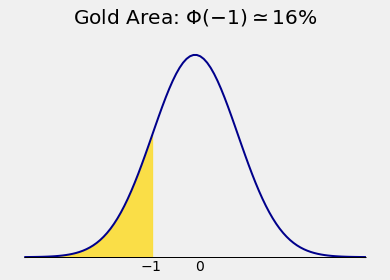

In [14]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=-1)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(-1.3, -0.025, '$-1$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(-1) \simeq 16\%$');

So the area under the standard normal curve between $-1$ and $1$ is about 68%:

In [16]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

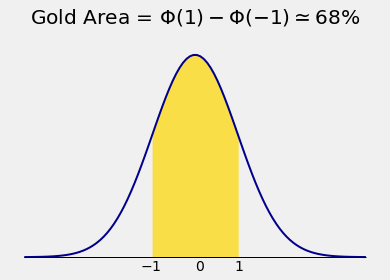

In [17]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1, left_end = -1)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(0.9, -0.025, '$1$')
plt.text(-1.3, -0.025, '$-1$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area = $\Phi(1) - \Phi(-1) \simeq 68\%$');

The area between $-2$ and $2$ is 

$$
\Phi(2) - \Phi(-2) ~ \approx ~ 95\%
$$

In [29]:
stats.norm.cdf(2) - stats.norm.cdf(-2) 

0.9544997361036416

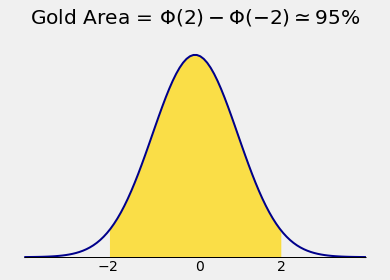

In [30]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=2, left_end = -2)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(1.9, -0.025, '$2$')
plt.text(-2.3, -0.025, '$-2$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area = $\Phi(2) - \Phi(-2) \simeq 95\%$');

### Percentiles ###

The area under the curve to the left of 1 is about 84%

$$
\Phi(1) ~ \approx ~ 0.84
$$

The point $z = 1$ is therefore called the *84th percentile* of the curve. If you think of the curve as a probability histogram, then about 84% of the probability lies below $z=1$.

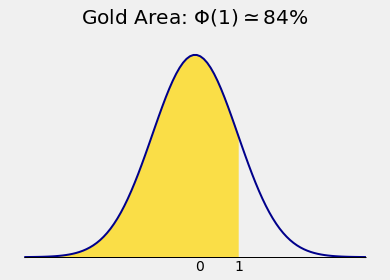

In [31]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(0.9, -0.025, '$1$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(1) \simeq 84\%$');

The 90th percentile must be to the right of 1. But how far to the right?

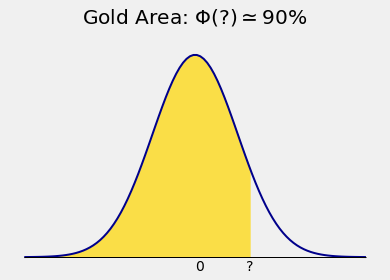

In [36]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1.28)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(1.2, -0.025, '?')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(?) \simeq 90\%$');

To find it, we need the *inverse* of $\Phi$.

The 90th percentile is the point $z$ such that $\Phi(z) = 0.9$.

In math notation, the 90th percentile is the point

$$
z ~ = ~ \Phi^{-1} (0.9)
$$

In `SciPy`, the function $\Phi^{-1}$ is named `ppf` for "percent point function". The 90th percentile or "90 percent point" of the curve is about 1.28:

In [32]:
stats.norm.ppf(0.9)

1.2815515655446004

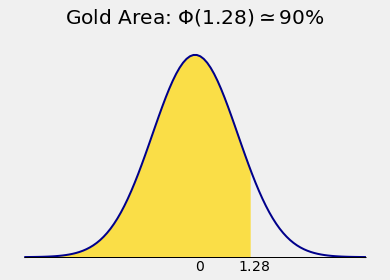

In [34]:
# NO CODE

Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, right_end=1.28)
plt.ylim(-0.01, 0.45)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.text(0, -0.025, '$0$')
plt.text(1, -0.025, '$1.28$')
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.title('Gold Area: $\Phi(1.28) \simeq 90\%$');

### Summary of Methods ###

**1.** First, you learned to find areas under the curve based on point specified on the horizontal axis. 

The main mathematical result is that for any $z$, the area under the curve to the left of $z$ is the proportion $p$ given by

$$
\Phi(z) = p
$$

Numerically, `stats.norm.cdf(z)` evaluates to $p$.

**2.** Next, you learned to find points on the horizontal axis based on specified areas under the curve.

The main mathematical result is that for any proportion $p$, the point $z$ that has area $p$ to the left is given by

$$
\Phi^{-1}(p) = z
$$

Numerically, `stats.norm.ppf(p)` evaluates to $z$.